In [1]:
! py -m pip install kaggle

In [2]:
import kaggle

In [3]:
! kaggle config set -n path -v C:\Users\pixel\$ML_PATHA\datasets
! kaggle datasets download ziya07/emotional-monitoring-dataset

^C
- path is now set to: C:\Users\pixel\$ML_PATHA\datasets
Dataset URL: https://www.kaggle.com/datasets/ziya07/emotional-monitoring-dataset
License(s): CC0-1.0




  0%|          | 0.00/72.7k [00:00<?, ?B/s]
100%|##########| 72.7k/72.7k [00:00<00:00, 173kB/s]
100%|##########| 72.7k/72.7k [00:00<00:00, 171kB/s]


In [ ]:
! pip install pandas

In [12]:
! pip install matplotlib

In [1]:
import pandas as pd

df = pd.read_csv('datasets\emotional_monitoring_dataset_with_target.csv')

import matplotlib.pyplot as plt

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HeartRate          1000 non-null   int64  
 1   SkinConductance    1000 non-null   float64
 2   EEG                1000 non-null   float64
 3   Temperature        1000 non-null   float64
 4   PupilDiameter      1000 non-null   float64
 5   SmileIntensity     1000 non-null   float64
 6   FrownIntensity     1000 non-null   float64
 7   CortisolLevel      1000 non-null   float64
 8   ActivityLevel      1000 non-null   int64  
 9   AmbientNoiseLevel  1000 non-null   int64  
 10  LightingLevel      1000 non-null   int64  
 11  EmotionalState     1000 non-null   object 
 12  CognitiveState     1000 non-null   object 
 13  EngagementLevel    1000 non-null   int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 109.5+ KB
None


In [2]:
df.head()

,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,engaged,distracted,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,engaged,distracted,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,partially engaged,focused,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,disengaged,focused,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,disengaged,focused,3


In [3]:
! pip install scikit-learn

import sklearn

In [4]:
print(df['EmotionalState'].unique())
print(df['CognitiveState'].unique())

['engaged' 'partially engaged' 'disengaged']
['distracted' 'focused']


In [5]:
# preperation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
scaler = StandardScaler()
#turning strings to floats
encEmotional = OrdinalEncoder(categories = [df['EmotionalState'].unique()])
encCognitive = OrdinalEncoder(categories = [df['CognitiveState'].unique()])
df['EmotionalState'] = encEmotional.fit_transform(df[['EmotionalState']])
df['CognitiveState'] = encCognitive.fit_transform(df[['CognitiveState']])

df.head()



,HeartRate,SkinConductance,EEG,Temperature,PupilDiameter,SmileIntensity,FrownIntensity,CortisolLevel,ActivityLevel,AmbientNoiseLevel,LightingLevel,EmotionalState,CognitiveState,EngagementLevel
0,61,8.937204,11.794946,36.501723,3.330181,0.689238,0.189024,0.603035,136,59,394,0.0,0.0,3
1,60,12.635397,19.151412,36.618910,3.428995,0.561056,0.091367,0.566671,155,39,479,0.0,0.0,1
2,81,3.660028,6.226098,36.176898,2.819286,0.417951,0.227355,1.422475,55,30,832,1.0,1.0,3
3,119,0.563070,4.542968,37.205293,2.192961,0.140186,0.502965,1.669045,39,40,602,2.0,1.0,3
4,118,0.477378,0.996209,37.248118,2.450139,0.064471,0.695604,1.854076,10,42,908,2.0,1.0,3


In [6]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_prep = scaler.fit_transform(df)
print(df_prep[0])

[-1.64029977  0.96766499  0.58813243 -0.55870567  0.9274594   0.94425081
 -0.67374948 -1.48505306  0.96241325  1.66300728 -1.32392132 -1.22399584
 -0.94548368  0.77767259]


In [7]:
! pip install numpy

import numpy as np
corr = np.corrcoef(df_prep.T)

In [8]:
print(df.columns)
print(df.shape)
print(corr.shape)



Index(['HeartRate', 'SkinConductance', 'EEG', 'Temperature', 'PupilDiameter',
       'SmileIntensity', 'FrownIntensity', 'CortisolLevel', 'ActivityLevel',
       'AmbientNoiseLevel', 'LightingLevel', 'EmotionalState',
       'CognitiveState', 'EngagementLevel'],
      dtype='object')
(1000, 14)
(14, 14)


In [9]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(corr)
print(eigenvalues)
# the stark difference in eigen values from the first to the remaining implies a high level of correlation which could be explained by one variable with many other variables with a smaller influence
# first variable accounts for 58% of the variance, the top 3 account for 74% of variance

[8.20715038 1.10115007 1.03442568 0.97202012 0.88568031 0.95975624
 0.01428103 0.15490946 0.13965478 0.1204043  0.09156433 0.10302271
 0.10875577 0.10722481]


In [10]:
print(eigenvectors[0])
print(eigenvectors[1])
print(eigenvectors[2])

[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
  2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
  6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
  8.09186586e-01 -1.30970161e-01]
[ 0.31081722  0.17806044  0.10216028  0.140087   -0.17157724 -0.01682645
  0.11079287  0.79196299  0.05201317 -0.20311887  0.16594236  0.10983354
  0.13306067  0.26675019]
[ 3.26666880e-01  8.53073162e-02  3.84452050e-02  8.17843825e-02
 -8.25900564e-02 -2.45457936e-02  1.25127917e-01 -4.20707011e-01
 -3.66125787e-05  2.91565924e-01  6.94791880e-02 -6.63591464e-02
  3.61006747e-01  6.73202971e-01]


In [11]:
# axis= np.matrix([df * eigenvectors[0], df * eigenvectors[1]])
df_matrix = np.matrix(df)
print(eigenvectors.T[0].shape)
print(eigenvectors[0].transpose().shape)
print(eigenvectors[0].shape)
print("")
print(eigenvectors.T[0])
print(eigenvectors[0].T)
print(eigenvectors[0])


(14,)
(14,)
(14,)

[-0.33038525  0.31081722  0.32666688 -0.15927825  0.32585023  0.33140746
 -0.32937948 -0.33225238  0.32507098 -0.00514406 -0.00035349 -0.34646773
 -0.00224119 -0.039026  ]
[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
  2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
  6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
  8.09186586e-01 -1.30970161e-01]
[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
  2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
  6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
  8.09186586e-01 -1.30970161e-01]


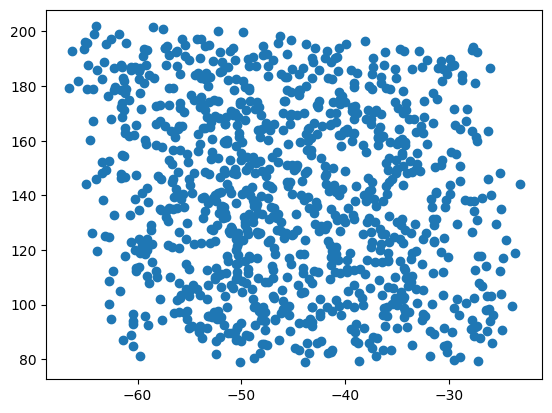

In [16]:
axis = np.array([[eigenvectors[0] * df_matrix.transpose()], 
                 [eigenvectors[1] * df_matrix.transpose()]])

plt.scatter(axis[0], axis[1])
plt.show()

In [ ]:
# a high variance dataset, a negative correlation can be seen but this will likely be removed with the third component

In [35]:

for i in range(len(df.columns)):
    print(df.columns[i-1] + "\t " + str(eigenvectors[0][i-1]) + "\t " + str(eigenvectors[1][i-1]) + "\t " + str(eigenvectors[2][i-1]))



EngagementLevel	 -0.1309701614859095	 0.2667501905936769	 0.6732029711031255
HeartRate	 -0.3303852467029443	 0.3108172212416451	 0.32666687983144144
SkinConductance	 0.06036009359898652	 0.17806043990885367	 0.0853073161781098
EEG	 0.015033926112002742	 0.10216027623785764	 0.038445204994199456
Temperature	 0.052046735370304346	 0.14008699689494433	 0.08178438246579613
PupilDiameter	 0.002667059631794673	 -0.17157723689736953	 -0.0825900564448377
SmileIntensity	 6.68870527499411e-05	 -0.01682644565362786	 -0.024545793581243695
FrownIntensity	 -0.12107856066657603	 0.11079287449667778	 0.12512791701959328
CortisolLevel	 -0.07438818134208519	 0.791962993743285	 -0.4207070106665207
ActivityLevel	 0.06327480878809595	 0.05201316976389045	 -3.66125786973758e-05
AmbientNoiseLevel	 -0.4298134360054729	 -0.20311886597125342	 0.29156592396123976
LightingLevel	 -0.006481828238846027	 0.16594236240364602	 0.06947918798868592
EmotionalState	 -0.057837786949104866	 0.10983353633294417	 -0.066359146

In [21]:
for y in eigenvectors[1]:
    print(y) 

0.3108172212416451
0.17806043990885367
0.10216027623785764
0.14008699689494433
-0.17157723689736953
-0.01682644565362786
0.11079287449667778
0.791962993743285
0.05201316976389045
-0.20311886597125342
0.16594236240364602
0.10983353633294417
0.13306067382489506
0.2667501905936769


In [ ]:
# from these PCA components, two variables can be seen. In the first one, the main contributing factors are awareness 
#and negative correlation with ambient noise, hard to say for certain what it is becase high ambient noise and low engagement would imply distraction/focus
#however focus is it's own variable that is not show to be particularly high but for the same of simplicity we will call it the "focus" component
# The second component is very strongly correlated to cortisol and heart rate, this could be seen as the component explaining "stress"
# Thus it could be seen that the main two factors in the data set are level of stress and level of focus, which interestingly shows
#that these twi factors are independent from one another

In [25]:
for y in eigenvectors[2]:
    print(y) 

0.32666687983144144
0.0853073161781098
0.038445204994199456
0.08178438246579613
-0.0825900564448377
-0.024545793581243695
0.12512791701959328
-0.4207070106665207
-3.66125786973758e-05
0.29156592396123976
0.06947918798868592
-0.06635914641170808
0.3610067465348925
0.6732029711031255


In [26]:
# this component is strongly correlated with the last two factors, engagement and cognitive state, as well as heart rate and negatively correlated with cortisol. 
#It clearly has some overlap with the first PC, it may represent "excitement" which is different from stress and 
#

topThreeValue = 8.20715038 + 1.10115007 + 1.03442568
total = 0

for x in eigenvalues:
        total=total+x
    
print(topThreeValue/total)

0.7387661521428577


In [27]:
# the number above describes how much of the variance these three components can explain, 58% is the first component alone.
#focus is by far the most important factor in terms of predicting other aspects of the body, second to stress and excitement thereafter.
print(total)

13.999999999999991


In [ ]:
# what I did not realise but makes sense is all eigenvectors added up equal to however many factors there are.

In [42]:
eigenvectorsMatrix = np.matrix(eigenvectors)

print(type(eigenvectorsMatrix))
print(eigenvectorsMatrix.shape)
print(eigenvectorsMatrix)

<class 'numpy.matrix'>
(14, 14)
[[-3.30385247e-01  6.03600936e-02  1.50339261e-02  5.20467354e-02
   2.66705963e-03  6.68870527e-05 -1.21078561e-01 -7.43881813e-02
   6.32748088e-02 -4.29813436e-01 -6.48182824e-03 -5.78377869e-02
   8.09186586e-01 -1.30970161e-01]
 [ 3.10817221e-01  1.78060440e-01  1.02160276e-01  1.40086997e-01
  -1.71577237e-01 -1.68264457e-02  1.10792874e-01  7.91962994e-01
   5.20131698e-02 -2.03118866e-01  1.65942362e-01  1.09833536e-01
   1.33060674e-01  2.66750191e-01]
 [ 3.26666880e-01  8.53073162e-02  3.84452050e-02  8.17843825e-02
  -8.25900564e-02 -2.45457936e-02  1.25127917e-01 -4.20707011e-01
  -3.66125787e-05  2.91565924e-01  6.94791880e-02 -6.63591464e-02
   3.61006747e-01  6.73202971e-01]
 [-1.59278252e-01  2.27636679e-01  2.97066120e-01  2.29262267e-01
  -8.06521186e-01 -5.97172159e-02 -5.29273444e-02 -8.41865334e-02
   2.20221689e-02  1.25178093e-01 -2.77388325e-01 -4.81691700e-02
  -7.70915773e-02 -1.29263584e-01]
 [ 3.25850231e-01 -1.48360570e-02  4

In [54]:
(eigenvectorsMatrix[0] * np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).transpose())

matrix([[-0.1483191,  0.       ,  0.       ]])

In [56]:
eigenvaluesShort = np.array([eigenvectorsMatrix[0],
                             eigenvectorsMatrix[1],
                             eigenvectorsMatrix[2]])
    



In [58]:
eigenvaluesShort = eigenvaluesShort.reshape(14, 3,)

In [59]:
corr = np.corrcoef(eigenvaluesShort.T)
corr.shape

(3, 3)

In [60]:
corr

array([[ 1.        , -0.11248168,  0.04077706],
       [-0.11248168,  1.        ,  0.27081701],
       [ 0.04077706,  0.27081701,  1.        ]])

In [ ]:
#there is slight correlation between the second and third variables

In [61]:
plt.show()

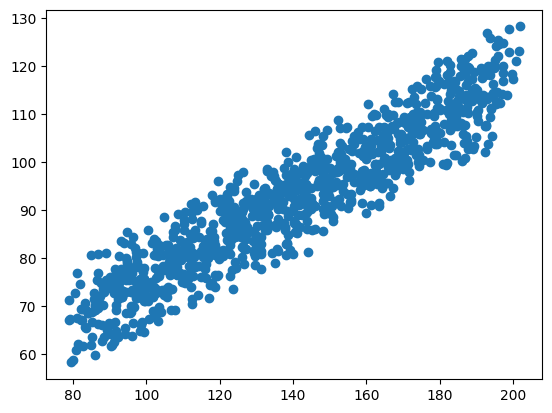

In [64]:
axis = np.array([[eigenvectors[0] * df_matrix.transpose()], 
                 [eigenvectors[1] * df_matrix.transpose()],
              [eigenvectors[2] * df_matrix.transpose()]])

plt.scatter(axis[1], axis[2])
plt.show()

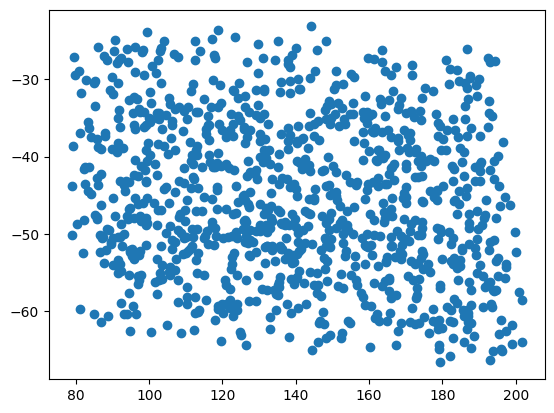

In [66]:
plt.scatter(axis[1], axis[0])
plt.show()

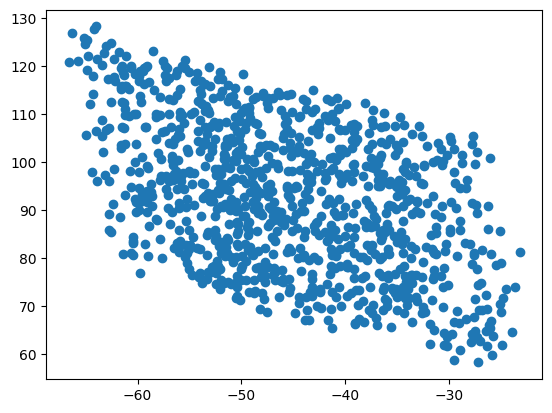

In [67]:
plt.scatter(axis[0], axis[2])
plt.show()

In [ ]:
# correction, there is a correlation between the third and second components, but there is also a weak correlation between first and third,
#there is the lowest correlation between first and second
#For PCA the ideal is to have uncorrelated components

In [68]:
axis.shape

(3, 1, 1, 1000)

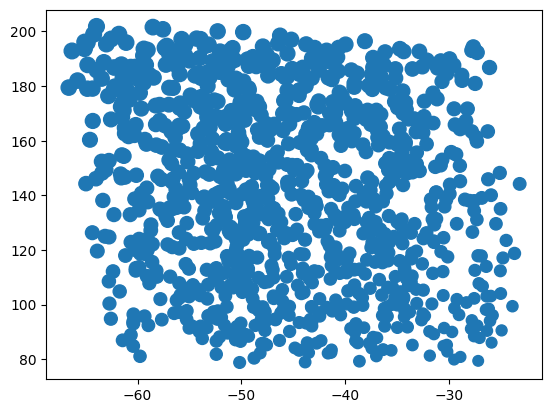

In [69]:
plt.scatter(axis[0], axis[1], axis[2])
plt.show()

In [ ]:
# size represents the third principle component and it is not evenly dispursed (it gets lighter on the bottom right), showing how the third component as
#having correltion with other variables